<a href="https://colab.research.google.com/github/SoumyadeepB/Reinforcement-Learning/blob/master/N_step_Sarsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline


In [0]:
def nstep_sarsa(env, n=1, alpha=0.1, gamma=0.9, epsilon=0.1, num_ep=int(1e4)):

    """ TODO: implement the n-step sarsa algorithm """
    
    total_episode_length = 0
    for ep in tqdm(range(num_ep)):      
      state = env.reset()
      obs = env.reset()
      n_states = env.observation_space.n
      n_actions = env.action_space.n
      Q = np.random.rand(n_states,n_actions)   # Initializing random Q values for each (s,a)
      policy = np.argmax(Q,axis=1)          # Greedy policy based on the Q(s,a)     

      done = False
      t = 0
      tau = 0
      G=0
      T = np.inf

      states = [0]
      actions = [policy[0]]
      rewards = [0]
      
      while not done:
        if t < T:
          #curr_state = states[t]
          A = actions[t]   # take action A_t
          S , R , done , _ =  env.step(A)
          states.append(S)
          actions.append(A)
          rewards.append(R)

          if done:
            T = t+1
          else:
            actions.append(policy[S])  # action corresponding to current state S

        tau = t - n + 1
        if tau >= 0:
          for i in range(tau+1,min((tau+n,T))):
            R_i = rewards[i]
            G += ((gamma ** (i-tau-1)) * R_i)
          
          if (tau+n) < T:
            G = G + (gamma**n) * Q[states[tau+n], actions[tau+n]]

          Q[states[tau],actions[tau]] += alpha * (G - Q[states[tau], actions[tau]])
          policy = np.argmax(Q,axis=1) #Update Policy (Greedy)

        t += 1

      
      total_episode_length += t
        
    avg_ep_length = (total_episode_length/num_ep) 
    print("N=",n," alpha= {:.2f}".format(alpha)," Episode_length=",avg_ep_length)
    return avg_ep_length


In [18]:
env=gym.make('FrozenLake-v0', map_name="8x8")
# TODO: run multiple times, evaluate the performance for different n and alpha
alphas = np.linspace(0.1,1,10)
lst = []
for n in range(10):
  for alpha in alphas:
    avg_ep_length = nstep_sarsa(env, n=n, alpha=alpha)
    lst.append((n,alpha,avg_ep_length))

  1%|▏         | 138/10000 [00:00<00:07, 1357.53it/s]

N= 0  alpha= 0.10  Episode_length= 45.1177


  1%|▏         | 139/10000 [00:00<00:07, 1388.89it/s]

N= 0  alpha= 0.20  Episode_length= 44.8629


  1%|▏         | 127/10000 [00:00<00:07, 1259.19it/s]

N= 0  alpha= 0.30  Episode_length= 45.6425


  1%|▏         | 130/10000 [00:00<00:07, 1298.16it/s]

N= 0  alpha= 0.40  Episode_length= 46.0691


  1%|▏         | 138/10000 [00:00<00:07, 1365.44it/s]

N= 0  alpha= 0.50  Episode_length= 45.5509


  1%|          | 109/10000 [00:00<00:09, 1079.94it/s]

N= 0  alpha= 0.60  Episode_length= 45.3665


  1%|▏         | 136/10000 [00:00<00:07, 1359.31it/s]

N= 0  alpha= 0.70  Episode_length= 45.7615


  1%|▏         | 130/10000 [00:00<00:07, 1299.88it/s]

N= 0  alpha= 0.80  Episode_length= 45.6774


  1%|▏         | 137/10000 [00:00<00:07, 1353.30it/s]

N= 0  alpha= 0.90  Episode_length= 45.732


  1%|          | 122/10000 [00:00<00:08, 1212.89it/s]

N= 0  alpha= 1.00  Episode_length= 44.4616


  1%|▏         | 132/10000 [00:00<00:07, 1317.84it/s]

N= 1  alpha= 0.10  Episode_length= 43.2294


  1%|          | 117/10000 [00:00<00:08, 1165.18it/s]

N= 1  alpha= 0.20  Episode_length= 44.0963


  1%|▏         | 135/10000 [00:00<00:07, 1336.53it/s]

N= 1  alpha= 0.30  Episode_length= 43.2685


  1%|▏         | 144/10000 [00:00<00:06, 1432.59it/s]

N= 1  alpha= 0.40  Episode_length= 42.9636


  2%|▏         | 151/10000 [00:00<00:06, 1508.00it/s]

N= 1  alpha= 0.50  Episode_length= 42.9745


  1%|▏         | 125/10000 [00:00<00:07, 1249.20it/s]

N= 1  alpha= 0.60  Episode_length= 42.5416


  2%|▏         | 157/10000 [00:00<00:06, 1568.54it/s]

N= 1  alpha= 0.70  Episode_length= 42.4762


  1%|▏         | 149/10000 [00:00<00:06, 1486.37it/s]

N= 1  alpha= 0.80  Episode_length= 42.2021


  1%|▏         | 144/10000 [00:00<00:06, 1435.44it/s]

N= 1  alpha= 0.90  Episode_length= 42.048


  1%|▏         | 130/10000 [00:00<00:07, 1297.28it/s]

N= 1  alpha= 1.00  Episode_length= 41.3247


  1%|          | 119/10000 [00:00<00:08, 1172.06it/s]

N= 2  alpha= 0.10  Episode_length= 42.7431


  1%|▏         | 141/10000 [00:00<00:07, 1407.11it/s]

N= 2  alpha= 0.20  Episode_length= 42.6051


  1%|▏         | 149/10000 [00:00<00:06, 1480.78it/s]

N= 2  alpha= 0.30  Episode_length= 42.3204


  2%|▏         | 160/10000 [00:00<00:06, 1596.89it/s]

N= 2  alpha= 0.40  Episode_length= 41.7345


  2%|▏         | 152/10000 [00:00<00:06, 1514.67it/s]

N= 2  alpha= 0.50  Episode_length= 42.0899


  1%|▏         | 145/10000 [00:00<00:06, 1446.65it/s]

N= 2  alpha= 0.60  Episode_length= 41.4997


  2%|▏         | 151/10000 [00:00<00:06, 1493.08it/s]

N= 2  alpha= 0.70  Episode_length= 41.9098


  2%|▏         | 150/10000 [00:00<00:06, 1488.71it/s]

N= 2  alpha= 0.80  Episode_length= 40.9591


  2%|▏         | 165/10000 [00:00<00:05, 1642.47it/s]

N= 2  alpha= 0.90  Episode_length= 41.1181


  2%|▏         | 163/10000 [00:00<00:06, 1623.17it/s]

N= 2  alpha= 1.00  Episode_length= 40.1534


  1%|▏         | 139/10000 [00:00<00:07, 1372.14it/s]

N= 3  alpha= 0.10  Episode_length= 42.0329


  1%|▏         | 134/10000 [00:00<00:07, 1333.93it/s]

N= 3  alpha= 0.20  Episode_length= 42.142


  1%|▏         | 126/10000 [00:00<00:07, 1258.29it/s]

N= 3  alpha= 0.30  Episode_length= 41.0763


  1%|          | 124/10000 [00:00<00:08, 1227.30it/s]

N= 3  alpha= 0.40  Episode_length= 41.5221


  1%|▏         | 132/10000 [00:00<00:07, 1319.24it/s]

N= 3  alpha= 0.50  Episode_length= 41.0355


  2%|▏         | 150/10000 [00:00<00:06, 1498.83it/s]

N= 3  alpha= 0.60  Episode_length= 41.0817


  1%|▏         | 138/10000 [00:00<00:07, 1367.65it/s]

N= 3  alpha= 0.70  Episode_length= 41.3425


  1%|▏         | 140/10000 [00:00<00:07, 1386.42it/s]

N= 3  alpha= 0.80  Episode_length= 40.9415


  1%|▏         | 144/10000 [00:00<00:06, 1428.17it/s]

N= 3  alpha= 0.90  Episode_length= 40.7826


  1%|▏         | 132/10000 [00:00<00:07, 1317.22it/s]

N= 3  alpha= 1.00  Episode_length= 40.2259


  2%|▏         | 155/10000 [00:00<00:06, 1544.54it/s]

N= 4  alpha= 0.10  Episode_length= 41.5889


  1%|▏         | 147/10000 [00:00<00:06, 1464.72it/s]

N= 4  alpha= 0.20  Episode_length= 41.5766


  3%|▎         | 303/10000 [00:00<00:06, 1485.08it/s]

N= 4  alpha= 0.30  Episode_length= 40.9698


  2%|▏         | 155/10000 [00:00<00:06, 1527.37it/s]

N= 4  alpha= 0.40  Episode_length= 41.2502


  2%|▏         | 156/10000 [00:00<00:06, 1555.48it/s]

N= 4  alpha= 0.50  Episode_length= 40.3317


  1%|▏         | 130/10000 [00:00<00:07, 1294.37it/s]

N= 4  alpha= 0.60  Episode_length= 40.5324


  1%|▏         | 131/10000 [00:00<00:07, 1302.95it/s]

N= 4  alpha= 0.70  Episode_length= 40.6627


  1%|▏         | 139/10000 [00:00<00:07, 1383.05it/s]

N= 4  alpha= 0.80  Episode_length= 41.1174


  1%|▏         | 145/10000 [00:00<00:06, 1444.89it/s]

N= 4  alpha= 0.90  Episode_length= 40.2583


  1%|          | 124/10000 [00:00<00:07, 1238.17it/s]

N= 4  alpha= 1.00  Episode_length= 40.3383


  1%|▏         | 131/10000 [00:00<00:07, 1284.39it/s]

N= 5  alpha= 0.10  Episode_length= 41.6179


  1%|▏         | 127/10000 [00:00<00:07, 1266.21it/s]

N= 5  alpha= 0.20  Episode_length= 40.6242


  2%|▏         | 150/10000 [00:00<00:06, 1499.33it/s]

N= 5  alpha= 0.30  Episode_length= 40.5065


  1%|▏         | 130/10000 [00:00<00:07, 1287.54it/s]

N= 5  alpha= 0.40  Episode_length= 40.5956


  2%|▏         | 155/10000 [00:00<00:06, 1543.44it/s]

N= 5  alpha= 0.50  Episode_length= 40.5168


  2%|▏         | 176/10000 [00:00<00:05, 1744.79it/s]

N= 5  alpha= 0.60  Episode_length= 40.0648


  1%|▏         | 142/10000 [00:00<00:07, 1398.96it/s]

N= 5  alpha= 0.70  Episode_length= 40.5816


  2%|▏         | 167/10000 [00:00<00:05, 1664.31it/s]

N= 5  alpha= 0.80  Episode_length= 40.2951


  3%|▎         | 290/10000 [00:00<00:06, 1415.53it/s]

N= 5  alpha= 0.90  Episode_length= 40.2332


  1%|▏         | 149/10000 [00:00<00:06, 1489.72it/s]

N= 5  alpha= 1.00  Episode_length= 40.3261


  1%|          | 119/10000 [00:00<00:08, 1186.70it/s]

N= 6  alpha= 0.10  Episode_length= 40.8626


  1%|▏         | 143/10000 [00:00<00:06, 1426.05it/s]

N= 6  alpha= 0.20  Episode_length= 40.8956


  2%|▏         | 155/10000 [00:00<00:06, 1548.93it/s]

N= 6  alpha= 0.30  Episode_length= 40.675


  2%|▏         | 160/10000 [00:00<00:06, 1598.81it/s]

N= 6  alpha= 0.40  Episode_length= 40.3107


  2%|▏         | 151/10000 [00:00<00:06, 1508.22it/s]

N= 6  alpha= 0.50  Episode_length= 40.6264


  1%|▏         | 135/10000 [00:00<00:07, 1343.07it/s]

N= 6  alpha= 0.60  Episode_length= 40.4882


  1%|▏         | 140/10000 [00:00<00:07, 1381.35it/s]

N= 6  alpha= 0.70  Episode_length= 39.8175


  2%|▏         | 161/10000 [00:00<00:06, 1603.08it/s]

N= 6  alpha= 0.80  Episode_length= 40.4377


  1%|▏         | 132/10000 [00:00<00:07, 1311.62it/s]

N= 6  alpha= 0.90  Episode_length= 40.1443


  1%|▏         | 141/10000 [00:00<00:07, 1408.30it/s]

N= 6  alpha= 1.00  Episode_length= 39.7231


  1%|          | 117/10000 [00:00<00:08, 1162.79it/s]

N= 7  alpha= 0.10  Episode_length= 40.7309


  1%|▏         | 146/10000 [00:00<00:06, 1458.54it/s]

N= 7  alpha= 0.20  Episode_length= 40.0556


  2%|▏         | 150/10000 [00:00<00:06, 1491.85it/s]

N= 7  alpha= 0.30  Episode_length= 40.9806


  1%|▏         | 143/10000 [00:00<00:06, 1426.56it/s]

N= 7  alpha= 0.40  Episode_length= 40.5132


  1%|▏         | 139/10000 [00:00<00:07, 1388.98it/s]

N= 7  alpha= 0.50  Episode_length= 39.9609


  1%|▏         | 140/10000 [00:00<00:07, 1394.57it/s]

N= 7  alpha= 0.60  Episode_length= 40.2635


  1%|          | 98/10000 [00:00<00:10, 975.92it/s]

N= 7  alpha= 0.70  Episode_length= 39.7036


  1%|▏         | 133/10000 [00:00<00:07, 1327.62it/s]

N= 7  alpha= 0.80  Episode_length= 40.129


  2%|▏         | 153/10000 [00:00<00:06, 1526.87it/s]

N= 7  alpha= 0.90  Episode_length= 39.8989


  1%|▏         | 138/10000 [00:00<00:07, 1373.08it/s]

N= 7  alpha= 1.00  Episode_length= 40.0513


  2%|▏         | 152/10000 [00:00<00:06, 1500.91it/s]

N= 8  alpha= 0.10  Episode_length= 40.5131


  1%|▏         | 143/10000 [00:00<00:06, 1408.72it/s]

N= 8  alpha= 0.20  Episode_length= 40.6891


  2%|▏         | 155/10000 [00:00<00:06, 1549.61it/s]

N= 8  alpha= 0.30  Episode_length= 41.0024


  1%|▏         | 142/10000 [00:00<00:06, 1419.79it/s]

N= 8  alpha= 0.40  Episode_length= 40.1969


  2%|▏         | 153/10000 [00:00<00:06, 1523.43it/s]

N= 8  alpha= 0.50  Episode_length= 39.7507


  1%|▏         | 134/10000 [00:00<00:07, 1324.01it/s]

N= 8  alpha= 0.60  Episode_length= 40.2529


  1%|▏         | 141/10000 [00:00<00:07, 1406.99it/s]

N= 8  alpha= 0.70  Episode_length= 39.4811


  1%|▏         | 136/10000 [00:00<00:07, 1359.87it/s]

N= 8  alpha= 0.80  Episode_length= 39.858


  2%|▏         | 159/10000 [00:00<00:06, 1586.63it/s]

N= 8  alpha= 0.90  Episode_length= 39.1445


  2%|▏         | 150/10000 [00:00<00:06, 1489.32it/s]

N= 8  alpha= 1.00  Episode_length= 39.6012


  1%|▏         | 138/10000 [00:00<00:07, 1370.62it/s]

N= 9  alpha= 0.10  Episode_length= 40.5931


  1%|▏         | 138/10000 [00:00<00:07, 1376.95it/s]

N= 9  alpha= 0.20  Episode_length= 39.5946


  1%|▏         | 133/10000 [00:00<00:07, 1322.21it/s]

N= 9  alpha= 0.30  Episode_length= 40.0843


  3%|▎         | 286/10000 [00:00<00:06, 1450.65it/s]

N= 9  alpha= 0.40  Episode_length= 40.1319


  1%|▏         | 148/10000 [00:00<00:06, 1475.50it/s]

N= 9  alpha= 0.50  Episode_length= 39.8232


  2%|▏         | 150/10000 [00:00<00:06, 1494.85it/s]

N= 9  alpha= 0.60  Episode_length= 39.9711


  2%|▏         | 150/10000 [00:00<00:06, 1498.99it/s]

N= 9  alpha= 0.70  Episode_length= 39.4906


  2%|▏         | 158/10000 [00:00<00:06, 1576.92it/s]

N= 9  alpha= 0.80  Episode_length= 39.5757


  2%|▏         | 157/10000 [00:00<00:06, 1557.41it/s]

N= 9  alpha= 0.90  Episode_length= 40.0455


100%|██████████| 10000/10000 [00:07<00:00, 1357.56it/s]

N= 9  alpha= 1.00  Episode_length= 39.6846


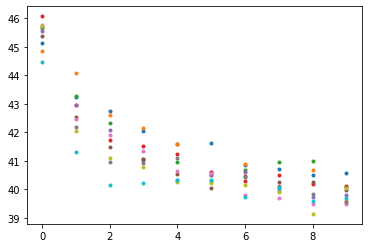

In [36]:
%matplotlib inline
for n,alpha,avg_ep in lst:
  plt.plot(n,avg_ep,'.-',label="n={}".format(n))

plt.show()

In [0]:
L = []
lst1 = [(alpha,ep) for _,alpha,ep in lst]
for i in range(10):
  L.append(lst1[i*10:(i+1)*10])


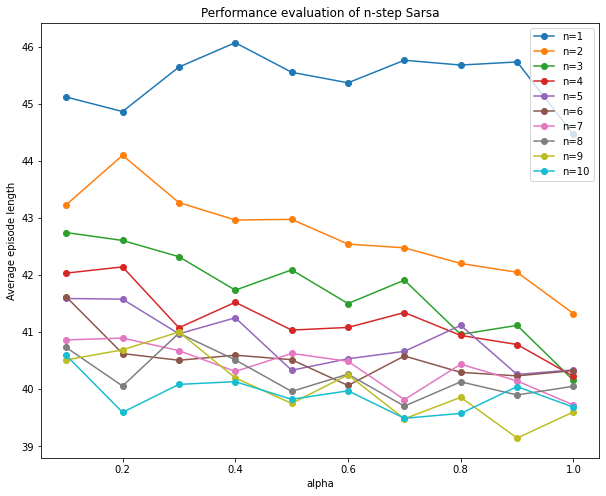

In [52]:
%matplotlib inline
plt.figure(figsize=(10,8))
n=1
for l in L:
  x = []
  y = []
  for alpha,ep in l:
    x.append(alpha)
    y.append(ep)

  plt.plot(x,y,'o-',label="n={}".format(n))
  n +=1

plt.title("Performance evaluation of n-step Sarsa")
plt.xlabel("alpha")
plt.ylabel("Average episode length")
plt.legend()
plt.show()
  
